In [276]:
import numpy as np
import cvxpy as cvx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm
from functools import partial
import dpilqr as dec


In [277]:
import logging
from pathlib import Path
import multiprocessing as mp
from os import getpid
import os
from time import strftime

### Importing SCP algorithm

In [278]:
from solve_scp import *

### Centralized SCP with one drone:

In [279]:
"""Run and example"""
coll_radius = 0.35
n_drones = 1
n_states = 12
n_controls = 4
g = 9.81
n = n_drones * n_states                                # total state dimension
m = n_drones * n_controls                              # total control dimension

# s_goal = np.array([-1.5, -1.5, 1.2, 0,  0 , 0, 0, 0, 0, 0, 0 , 0, #drone 1
#                    1.5, 1.5, 1.2, 0, 0 , 0, 0, 0, 0, 0, 0, 0 #drone 2
#                    ])                                                     
# s0 = np.array([0.1, 0.2, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
#                -0.5, 0.3, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  

s_goal = np.array([-1.5, -1.5, 1.2, 0,  0 , 0, 0, 0, 0, 0, 0 , 0])  # for 1 drone only
s0 = np.array([0.1, 0.2, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


dt = 0.1                             # discrete time resolution
T = 10.                              # total simulation time

x_dims = [12]
# fd = jax.jit(discretize(multi_Quad_Dynamics,dt))
fd = jax.jit(discretize(single_quad_dynamics,dt, x_dims))

# SCP parameters

P = 1e3*np.eye(n)                    # terminal state cost matrix
Q = np.eye(n)*10  # state cost matrix
R = 1e-3*np.eye(m)                   # control cost matrix
ρ = 200                              # trust region parameter
tol = 5e-1                           # convergence tolerance
max_iters = 100                      # maximum number of SCP iterations

t = np.arange(0., T + dt, dt)
N = t.size - 1
print(N)
# N = 50  

s, u = solve_scp(fd, P, Q, R, N, s_goal, s0, ρ, tol, max_iters, n_drones,coll_radius)

100


  0%|          | 0/100 [00:00<?, ?it/s]

current iteration is 0
total number of constraints is 501
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 17 01:15:37 PM: Your problem has 1612 variables, 501 constraints, and 0 parameters.
(CVXPY) Apr 17 01:15:38 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 01:15:38 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 01:15:38 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 01:15:39 PM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 17 01:15:39 PM: Reduct

  1%|          | 1/100 [00:10<16:34, 10.04s/it, objective change=inf]

current iteration is 1
total number of constraints is 501
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 17 01:15:41 PM: Your problem has 1612 variables, 501 constraints, and 0 parameters.
(CVXPY) Apr 17 01:15:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 01:15:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 01:15:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 01:15:41 PM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 17 01:15:41 PM: Reduct

  2%|▏         | 2/100 [00:11<07:42,  4.71s/it, objective change=22.62106]

current iteration is 2
total number of constraints is 501
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 17 01:15:42 PM: Your problem has 1612 variables, 501 constraints, and 0 parameters.
(CVXPY) Apr 17 01:15:42 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 01:15:42 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 01:15:42 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 01:15:42 PM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 17 01:15:42 PM: Reduct

  3%|▎         | 3/100 [00:12<04:59,  3.09s/it, objective change=2.33006] 

current iteration is 3
total number of constraints is 501
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 17 01:15:43 PM: Your problem has 1612 variables, 501 constraints, and 0 parameters.
(CVXPY) Apr 17 01:15:43 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 01:15:43 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 01:15:43 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 01:15:43 PM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 17 01:15:43 PM: Reduct

  4%|▍         | 4/100 [00:13<03:31,  2.20s/it, objective change=0.67769]

current iteration is 4
total number of constraints is 501
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 17 01:15:44 PM: Your problem has 1612 variables, 501 constraints, and 0 parameters.
(CVXPY) Apr 17 01:15:44 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 01:15:44 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 01:15:44 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 01:15:44 PM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 17 01:15:44 PM: Reduct

  4%|▍         | 4/100 [00:13<05:33,  3.47s/it, objective change=0.10963]

SCP converged after 4 iterations.


In [288]:
s_goal

array([-1.5, -1.5,  1.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

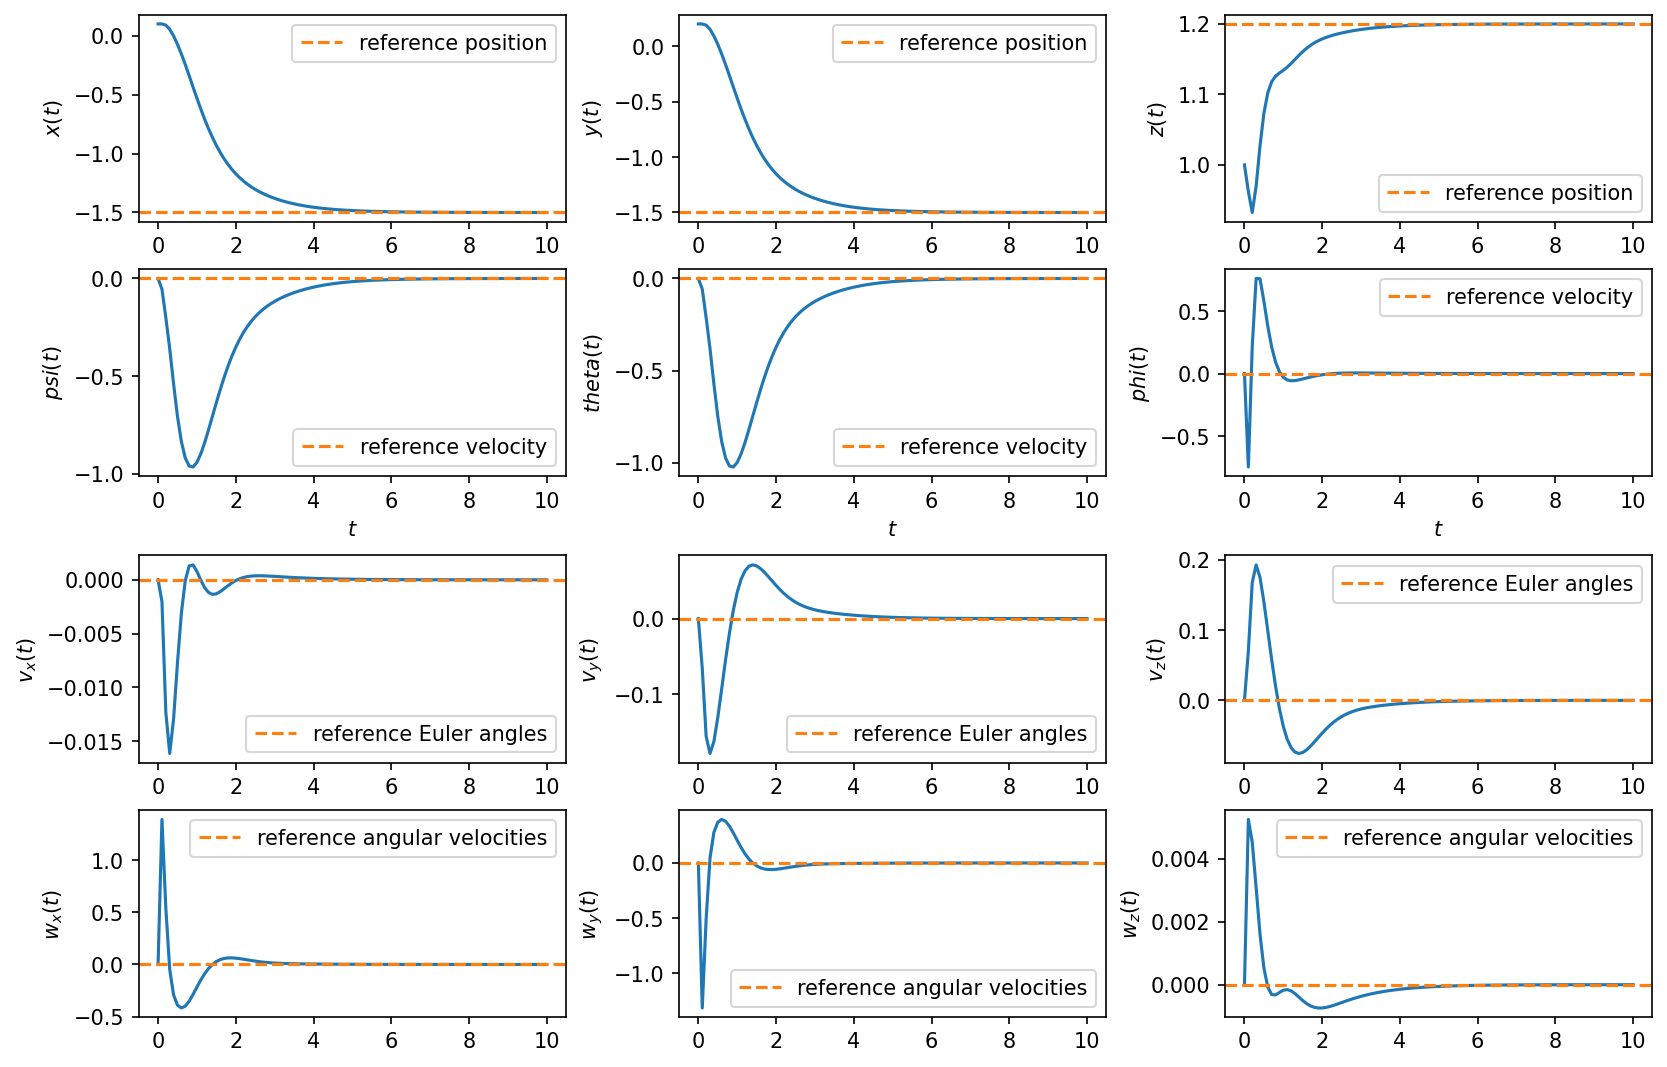

In [305]:

# Plot state trajectories
fig, ax = plt.subplots(4, 3, figsize=(11, 7), dpi=150)
ylabels = (r'$x(t)$', r'$y(t)$', r'$z(t)$', r'$v_x(t)$',r'$v_y(t)$',r'$v_z(t)$',
           r'$psi(t)$', r'$theta(t)$', r'$phi(t)$', r'$w_x(t)$',r'$w_y(t)$',r'$w_z(t)$')

for i in range(3):
    ax[0][i].plot(t, s[:, i], color='tab:blue')
    ax[0][i].axhline(s_goal[i], linestyle='--', color='tab:orange',label='reference position')
    ax[0][i].legend(loc='best',fontsize=10)

    ax[1][i].plot(t, s[:, i+6], color='tab:blue')
    ax[1][i].axhline(s_goal[i+6], linestyle='--', color='tab:orange',label='reference velocity')
    ax[1][i].legend(loc='best',fontsize=10)

    ax[2][i].plot(t, s[:, i+3], color='tab:blue')
    ax[2][i].axhline(s_goal[i+3], linestyle='--', color='tab:orange',label='reference Euler angles')
    ax[2][i].legend(loc='best',fontsize=10)

    ax[3][i].plot(t, s[:, i+9], color='tab:blue')
    ax[3][i].axhline(s_goal[i+9], linestyle='--', color='tab:orange',label='reference angular velocities')
    ax[3][i].legend(loc='best',fontsize=10)

    ax[1][i].set_xlabel(r'$t$')
    ax[0][i].set_ylabel(ylabels[i])
    ax[1][i].set_ylabel(ylabels[i+6])
    ax[2][i].set_ylabel(ylabels[i+3])
    ax[3][i].set_ylabel(ylabels[i+9])

plt.savefig('figures/state_tracking(singleDrone).png',
            bbox_inches='tight')
plt.show()



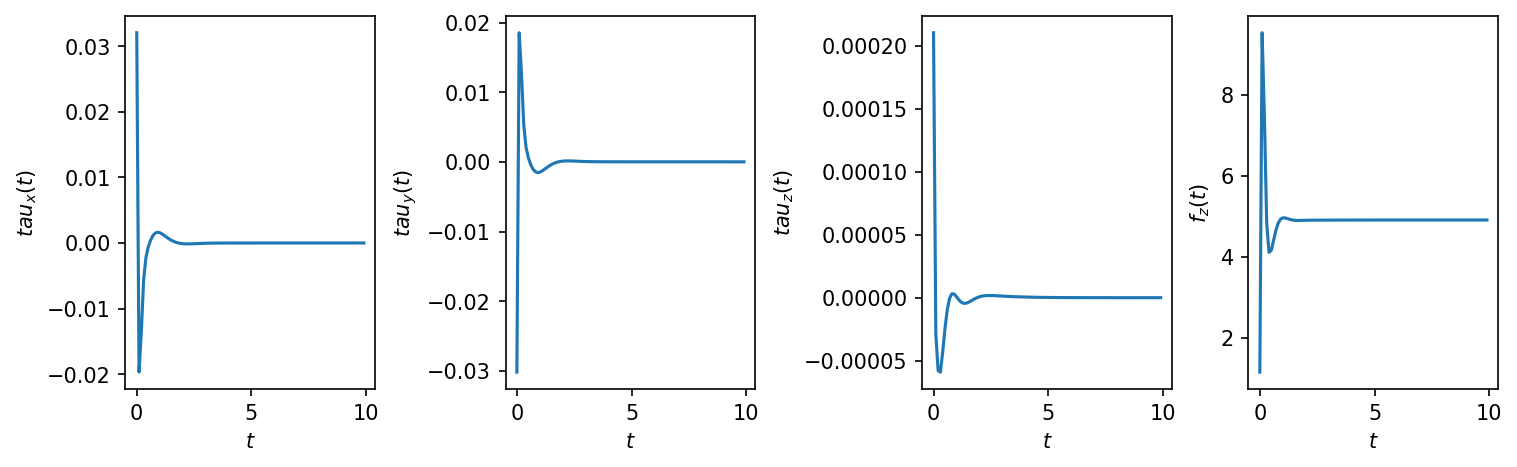

In [307]:

#Plot control trajectories
ylabels2 = (r'$tau_x(t)$', r'$tau_y(t)$', r'$tau_z(t)$', r'$f_z(t)$')
fig, ax = plt.subplots(1, 4, figsize=(10, 3), dpi=150)
u_ref_upper = np.array([1, 1, 1, 10])
u_ref_lower = np.array([-1, -1, -1, 0])

for j in range(4):

    ax[j].plot(t[:-1], u[:, j])
    # ax[j].axhline(u_ref_upper[j], linestyle='--',label='upper input bound')
    # ax[j].axhline(u_ref_lower[j], linestyle='--',label='lower input input')
    ax[j].set_xlabel(r'$t$')
    ax[j].set_ylabel(ylabels2[j])


plt.savefig('figures/control_tracking(singleDrone).png',
            bbox_inches='tight')
plt.show()

In [226]:
print(f'cumulative cost of trajectory is {objective(s,u, s_goal, s.shape[0]-1, Q, R, P)}')

cumulative cost of trajectory is 833.9799086157536


In [227]:
np.linalg.norm(s[-1][0:3]-s_goal[0:3]) #distance to goal

4.120885982753078e-05

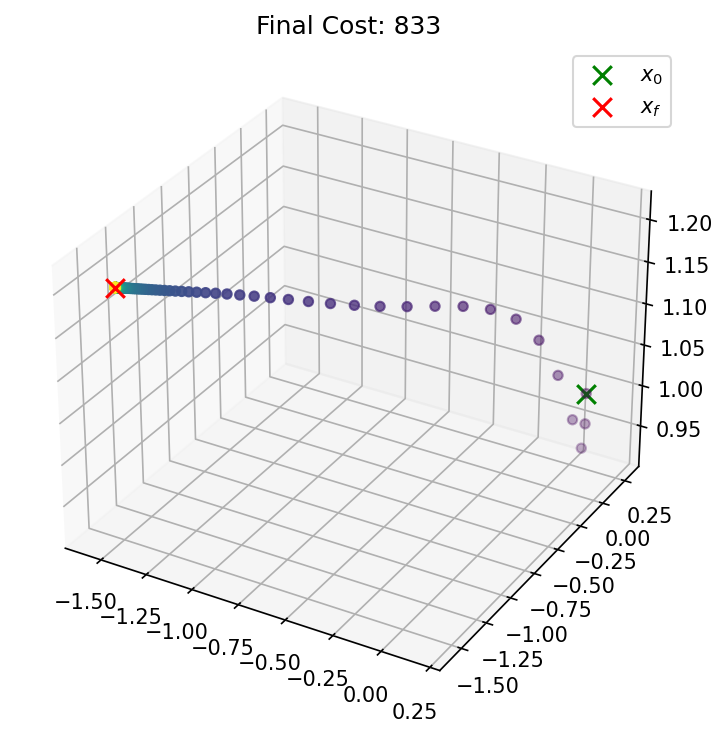

In [228]:
plt.figure(dpi=150)
dec.plot_solve(s,833,s_goal,[12],n_d=3)
plt.legend()
plt.savefig('1_quad_oneshotSCP_closed_loop.png')

### SCP with 2 drones (w/ collision avoidance)

In [271]:
n_drones = 2
n_states = 12
n_controls = 4
g = 9.81
n = n_drones * n_states                                # total state dimension
m = n_drones * n_controls                              # total control dimension

s_goal = np.array([-1.5, -1.5, 1.2, 0,  0 , 0, 0, 0, 0, 0, 0 , 0, #drone 1
                   1.5, 1.5, 1.2, 0, 0 , 0, 0, 0, 0, 0, 0, 0 #drone 2
                   ])                                                     
s0 = np.array([0.1, 0.2, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
               -0.5, 0.3, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  



dt = 0.1                             # discrete time resolution
T = 10.                              # total simulation time

x_dims = [n_states]*n_drones
fd = jax.jit(discretize(multi_Quad_Dynamics, dt, x_dims))
# fd = jax.jit(discretize(single_quad_dynamics,dt, x_dims))

# SCP parameters

P = 1e3*np.eye(n)                    # terminal state cost matrix
Q = np.eye(n)*10  # state cost matrix
R = 1e-3*np.eye(m)                   # control cost matrix
ρ = 200                              # trust region parameter
tol = 5e-1                           # convergence tolerance
max_iters = 100                      # maximum number of SCP iterations

t = np.arange(0., T + dt, dt)
N = t.size - 1

coll_radius = 0.35
s, u = solve_scp(fd, P, Q, R, N, s_goal, s0, ρ, tol, max_iters, n_drones, coll_radius)

  0%|          | 0/100 [00:00<?, ?it/s]

current iteration is 0
total number of constraints is 901
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 16 09:52:05 AM: Your problem has 3224 variables, 901 constraints, and 0 parameters.
(CVXPY) Apr 16 09:52:06 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 16 09:52:06 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 16 09:52:06 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 16 09:52:06 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 16 09:52:06 AM: Reduct

  1%|          | 1/100 [00:13<22:31, 13.65s/it, objective change=inf]

current iteration is 1
total number of constraints is 1101
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 16 09:52:07 AM: Your problem has 3224 variables, 1101 constraints, and 0 parameters.
(CVXPY) Apr 16 09:52:07 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 16 09:52:07 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 16 09:52:07 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 16 09:52:08 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 16 09:52:08 AM: Redu

  2%|▏         | 2/100 [00:15<11:26,  7.00s/it, objective change=45.17244]

current iteration is 2
total number of constraints is 1101
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 16 09:52:10 AM: Your problem has 3224 variables, 1101 constraints, and 0 parameters.
(CVXPY) Apr 16 09:52:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 16 09:52:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 16 09:52:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 16 09:52:10 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 16 09:52:10 AM: Redu

  3%|▎         | 3/100 [00:17<07:33,  4.68s/it, objective change=4.65647] 

current iteration is 3
total number of constraints is 1101
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 16 09:52:12 AM: Your problem has 3224 variables, 1101 constraints, and 0 parameters.
(CVXPY) Apr 16 09:52:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 16 09:52:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 16 09:52:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 16 09:52:12 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 16 09:52:12 AM: Redu

  4%|▍         | 4/100 [00:20<05:58,  3.73s/it, objective change=1.35201]

current iteration is 4
total number of constraints is 1101
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 16 09:52:14 AM: Your problem has 3224 variables, 1101 constraints, and 0 parameters.
(CVXPY) Apr 16 09:52:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 16 09:52:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 16 09:52:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 16 09:52:14 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 16 09:52:14 AM: Redu

  4%|▍         | 4/100 [00:22<08:56,  5.59s/it, objective change=0.21824]

SCP converged after 4 iterations.


In [273]:
print(f'cumulative cost of trajectory is {objective(s,u, s_goal, N, Q, R, P)}')

cumulative cost of trajectory is 1666.4681674508356


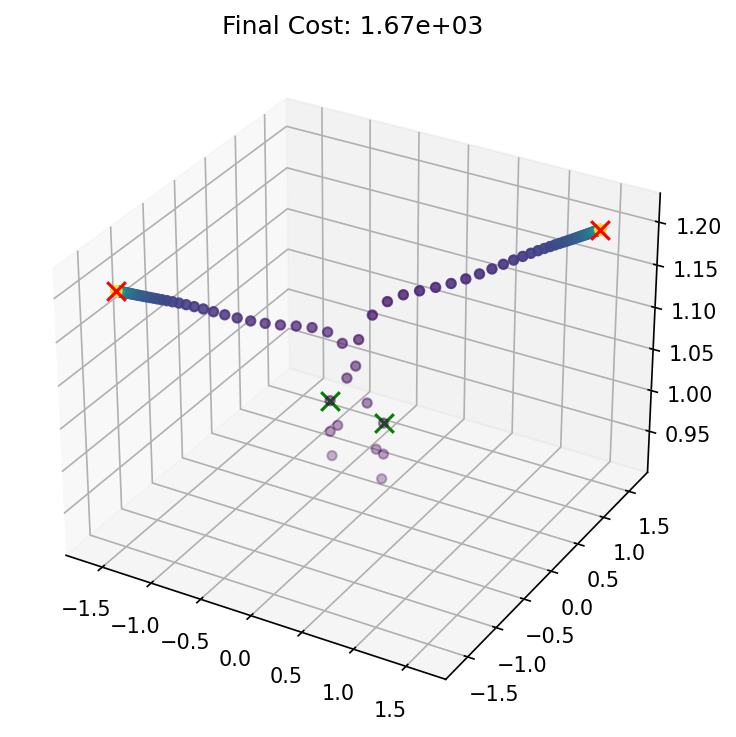

In [274]:
plt.figure(dpi=150)
dec.plot_solve(s,1666.96,s_goal,[12, 12],n_d=3)
plt.savefig('2_quad_oneshotSCP_closed_loop.png')

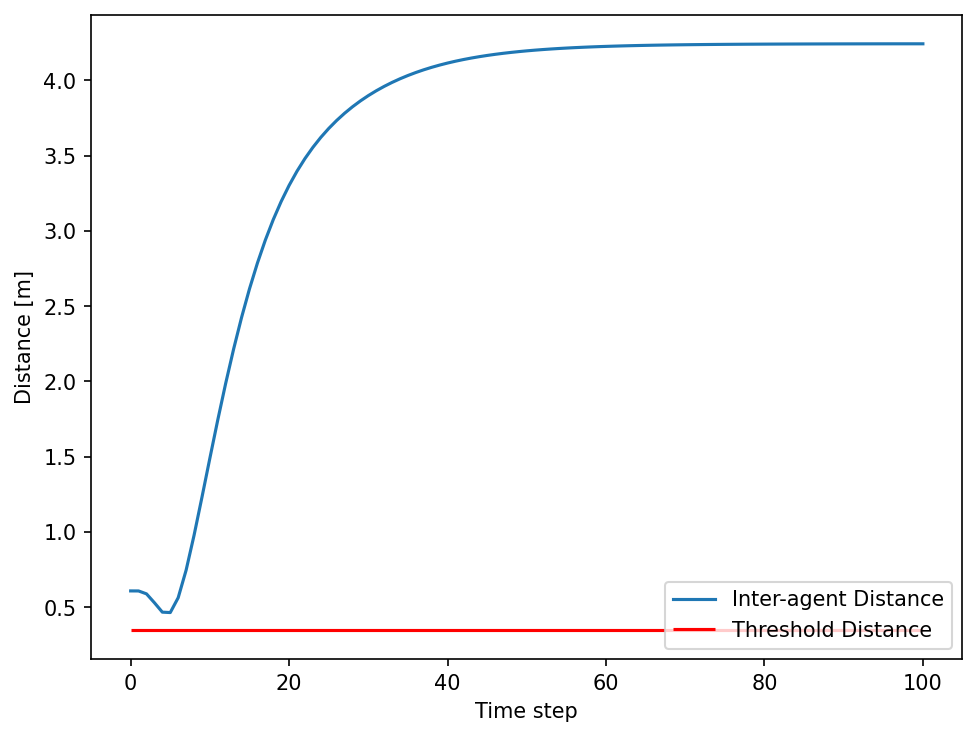

In [275]:
fig = plt.figure(dpi=150)
x_dims = [12, 12]
plt.plot(dec.compute_pairwise_distance(s,x_dims,n_d=3),label='Inter-agent Distance')
plt.hlines(coll_radius,0, 100, 'r' ,label='Threshold Distance')
plt.ylabel('Distance [m]')
plt.xlabel('Time step')
plt.legend()
plt.savefig('one_shot_2_quad_pariwise_distance.png');

In [245]:
dec.distance_to_goal(s[-1],s_goal,2, 12, 3)

array([4.134e-05, 4.127e-05])

### Run SCP in RHC

In [98]:
"""Run SCP in receding horizon"""

count = 0
si = s0
obj_list = []
n_agents = 1
N = 10
n_states = 12
u_try = np.array([0, 0, 0, 4.9])
u_bar = np.tile(u_try ,(N,1))
s_bar = np.zeros((N + 1, n))
s_bar[0] = s0
for k in range(N):
    s_bar[k+1] = fd(s_bar[k], u_bar[k])

X_trj =  np.zeros((0, n))  #Full trajectory over entire problem horizon (not just a single prediction horizon)
U_trj =  np.zeros((0, m))
STEP_SIZE=1

iterate = 0
s_prev = None
obj_prev = np.inf

tol = 5e-1
while not np.all(dec.distance_to_goal(si, s_goal.reshape(1,-1), n_agents ,n_states,n_d= 3) < 0.1) :
    s, u, obj = scp_iteration(fd, P, Q, R, N, s_bar, u_bar, s_goal, si,  ρ, iterate, s_prev, n_drones)

    s_prev = s
    
    diff_obj = np.abs(obj - obj_prev)
    print(f'current diff_obj is {diff_obj}')
    if diff_obj < tol:
       
        print('SCP converged')
        print(f'final cost is {obj}')
        break
    
    else:
        obj_prev = obj
        #Re-initialize nominal trajectory to shift prediction horizon
        s_bar = np.zeros((N + 1, n))
        s_bar[0] = s[STEP_SIZE]
        u_bar = np.tile(u_try ,(N,1))
        u_bar[0] = u[STEP_SIZE-1]

        count +=1
        
        obj_list.append(obj)
        
        print(f'current objective value is {obj}!\n')

        X_trj = np.r_[X_trj, s[:STEP_SIZE]]
        U_trj = np.r_[U_trj, u[:STEP_SIZE]]
        print(f'X_trj has shape {X_trj.shape}\n')

        if count >=60:
            print('max iteration reached')
            break


current iteration is 0
total number of constraints is 51
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 15 11:17:04 AM: Your problem has 172 variables, 51 constraints, and 0 parameters.
(CVXPY) Apr 15 11:17:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 15 11:17:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 15 11:17:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 15 11:17:04 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 15 11:17:04 AM: Reduction

In [233]:
print(f'cumulative cost of trajectory is {objective(X_trj, U_trj[:-1], s_goal, X_trj.shape[0]-1, Q, R, P)}')

cumulative cost of trajectory is 2770.8348740051665


Full trajectory has shape (22, 24)


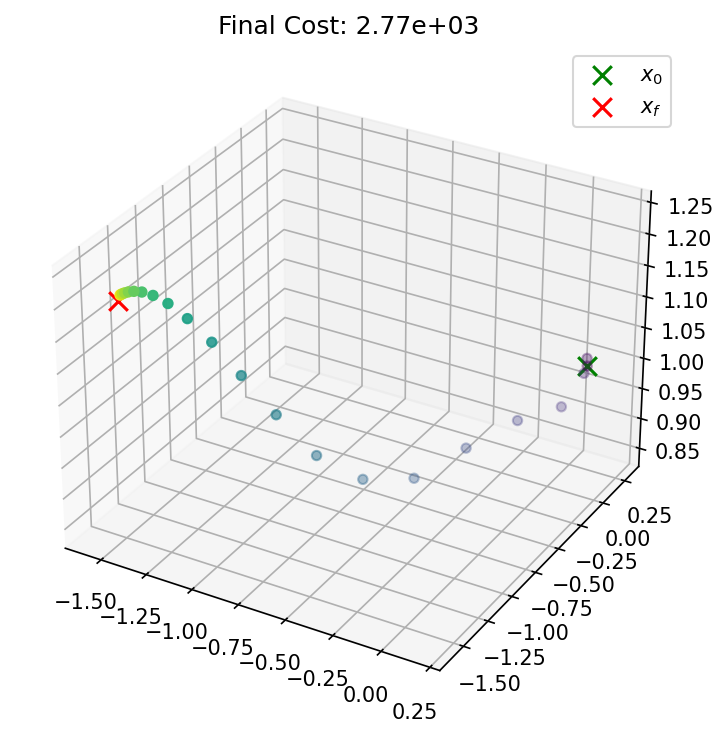

In [234]:
# Plot state and control trajectories
print(f'Full trajectory has shape {X_trj.shape}')
fig = plt.figure(dpi=150)
dec.plot_solve(X_trj,
               objective(X_trj, U_trj[:-1], s_goal, X_trj.shape[0]-1, Q, R, P),
               s_goal,
               x_dims = [12],
               n_d = 3)
plt.legend()
plt.savefig('1_quad_rhc_SCP.png')

In [236]:
np.linalg.norm(X_trj[-1][0:3]-s_goal[0:3])

0.028915758429056578

### RHC-SCP with 2 drones

In [249]:
from time import perf_counter

In [250]:
def run_scp_rhc(n_agents, n_states, n_inputs, N, dt, s_goal, s0, step_size):

    count = 0

    obj_list = []

    P = 1e3*np.eye(n_agents*n_states)                    # terminal state cost matrix
    Q = np.eye(n_agents*n_states)*10  # state cost matrix
    R = 1e-3*np.eye(n_agents*n_inputs)                   # control cost matrix
    ρ = 200                

    u_try = np.tile(np.array([0, 0, 0, 4.9]), (1, n_agents))

    x_dims = [n_states]*n_agents
    fd = jax.jit(discretize(multi_Quad_Dynamics, dt, x_dims))

    u_bar = np.tile(u_try ,(N,1))
    s_bar = np.zeros((N + 1, n_agents*n_states))
    s_bar[0] = s0
    for k in range(N):
        s_bar[k+1] = fd(s_bar[k], u_bar[k])

    X_trj =  np.zeros((0, n_agents*n_states))  #Full trajectory over entire problem horizon (not just a single prediction horizon)
    U_trj =  np.zeros((0, n_agents*n_inputs))

    i_trial = 0
    iterate = 0
    s_prev = None
    obj_prev = np.inf
    tol = 5e-1
    radius = 0.35
    si = s0

    t_solve_list = []
    converged = False
    while not np.all(dec.distance_to_goal(si, s_goal.reshape(1,-1), n_agents ,n_states,n_d= 3) < 0.1) :
        try:
            t_solve_start = perf_counter()
            s, u, obj = scp_iteration(fd, P, Q, R, N, s_bar, u_bar, s_goal, si,  ρ, iterate, s_prev, n_agents, radius)
            t_solve_per_step = perf_counter()-t_solve_start
            t_solve_list.append(t_solve_per_step)

        except RuntimeError:

            print('current trial failed')
            i_trial +=1
            
        s_prev = s
        
        diff_obj = np.abs(obj - obj_prev)
        print(f'current diff_obj is {diff_obj}')
        if diff_obj < tol:
                
            print('SCP converged')
            i_trial +=1
            converged = True
            break
        
        else:
            obj_prev = obj
            #Re-initialize nominal trajectory to shift prediction horizon
            s_bar = np.zeros((N + 1, n_agents*n_states))
            s_bar[0] = s[step_size]
            u_bar = np.tile(u_try ,(N,1))
            u_bar[0] = u[step_size-1]

            count +=1
            
            obj_list.append(obj)
            
            print(f'current objective value is {obj}!\n')

            X_trj = np.r_[X_trj, s[:step_size]]
            U_trj = np.r_[U_trj, u[:step_size]]
            print(f'X_trj has shape {X_trj.shape}\n')

            if count >=60:
                print('max iteration reached')
                i_trial +=1
                break
    
    if converged:
        objective_val = objective(X_trj,U_trj[1:],s_goal, N, Q, R, P)  
        t_solve_step = np.mean(t_solve_list)
        distance_to_goal = dec.distance_to_goal(X_trj, s_goal, n_agents, n_states, n_d=3)
    
    else:
        objective_val = None
        t_solve_step = None
        

    logging.info(
        "i_trial,n_agents,converged,objective_val,N,dt,radius,\
        t_solve_step, dist_to_goal"
    )

    return X_trj, U_trj



In [238]:
s_goal = np.array([-1.5, -1.5, 1.2, 0,  0 , 0, 0, 0, 0, 0, 0 , 0, #drone 1
                   1.5, 1.5, 1.2, 0, 0 , 0, 0, 0, 0, 0, 0, 0 #drone 2
                   ])                                                     
s0 = np.array([0.1, 0.2, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
               -0.5, 0.3, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  

In [239]:
X_trj, U_trj = run_scp_rhc(2, 12, 4, 10, 0.1, s_goal, s0, 1)

current iteration is 0
total number of constraints is 91
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Apr 15 03:49:28 PM: Your problem has 344 variables, 91 constraints, and 0 parameters.
(CVXPY) Apr 15 03:49:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 15 03:49:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 15 03:49:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 15 03:49:28 PM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 15 03:49:28 PM: Reduction

In [240]:
X_trj.shape

(22, 24)

Full trajectory has shape (22, 24)


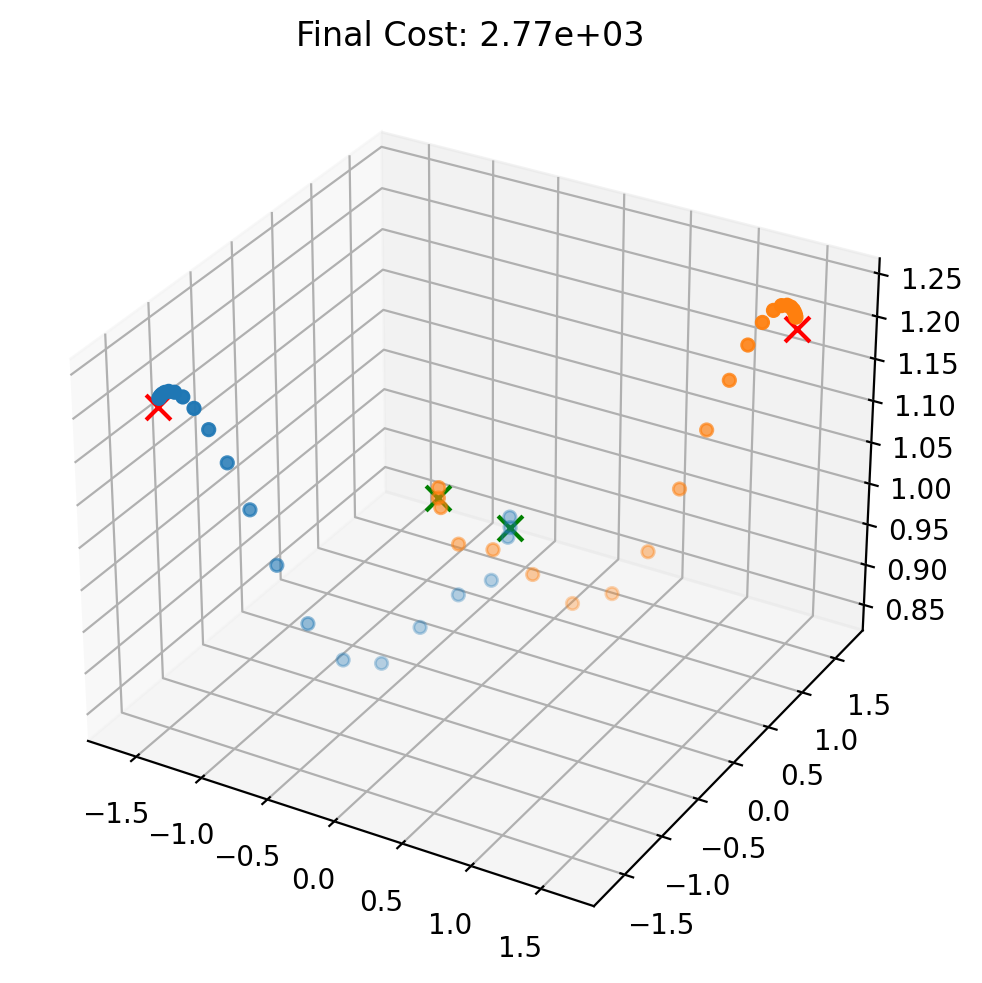

In [242]:

# Plot state and control trajectories
print(f'Full trajectory has shape {X_trj.shape}')
fig = plt.figure(dpi=200)
dec.plot_solve(X_trj, 
               objective(X_trj,U_trj[1:],s_goal, X_trj.shape[0]-1, Q, R, P),
               s_goal,
               x_dims,
               color_agents= True,
               n_d = 3)

plt.savefig('2_quad_rhc_SCP.png')

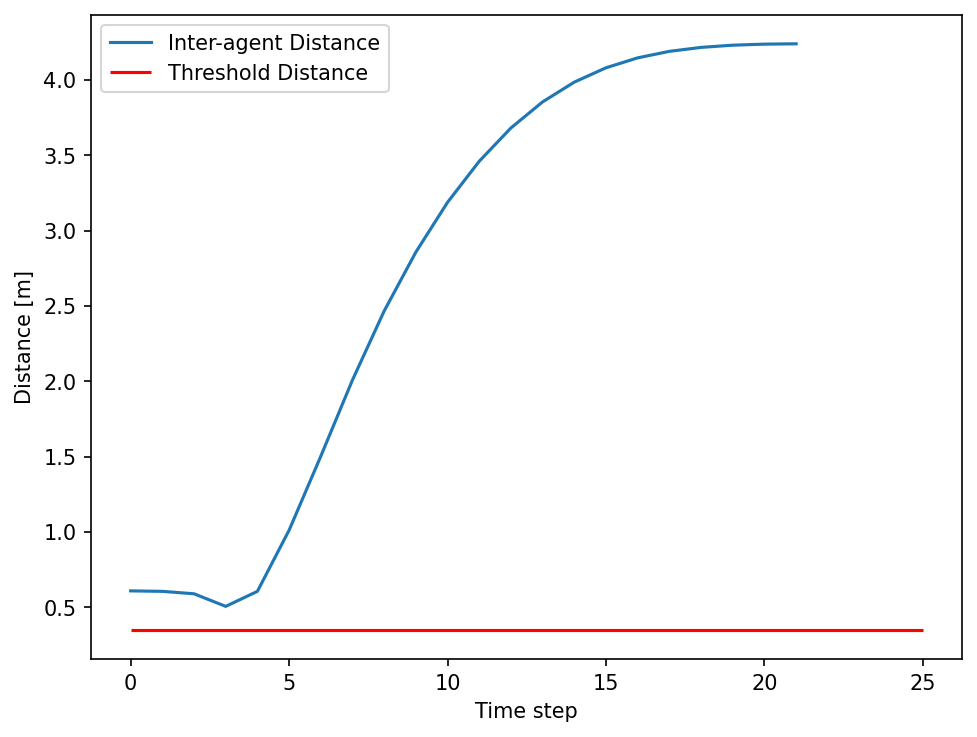

In [243]:
fig = plt.figure(dpi=150)
plt.plot(dec.compute_pairwise_distance(X_trj,x_dims,n_d=3),label='Inter-agent Distance')
plt.hlines(coll_radius,0, 25, 'r' ,label='Threshold Distance')
plt.ylabel('Distance [m]')
plt.xlabel('Time step')
plt.legend()
plt.savefig('2_quad_pariwise_distance.png');

In [244]:
dec.distance_to_goal(X_trj[-1],s_goal,2, 12, 3)

array([0.029, 0.03 ])

### Run a Monte-Carlo simulations (should run this in a terminal)

#### We try to run 30 trials for each test case. Each test case has a different number of agents. All initial and final conditiosn are randomly generated. Each test case is a RHC-SCP

In [189]:
n_states = 12

In [190]:
x0, xf = dec.random_setup(2, n_states, n_d = 3, energy = 5)


In [195]:
x0.squeeze().shape

(24,)

In [197]:
xf.squeeze().shape

(24,)

In [259]:
def multi_agent_run(n_agents, n_states, n_inputs, N, dt, s_goal, s0, step_size):
    
    x0,xf = dec.random_setup(n_agents, n_states, n_d = 3, energy = n_agents*1.5)
    x0 = x0.squeeze()
    xf = xf.squeeze()
    

    P = 1e3*np.eye(n_agents*n_states)                    # terminal state cost matrix
    Q = np.eye(n_agents*n_states)*10  # state cost matrix
    R = 1e-3*np.eye(n_agents*n_inputs)                   # control cost matrix
    ρ = 200                

    X_trj,U_trj = run_scp_rhc(n_agents, n_states, n_inputs, N, dt, s_goal, s0, step_size)


def setup_logger():
    
    # if centralized == True:
        
    LOG_PATH = Path(__file__).parent.parent / "logs"
    LOG_FILE = LOG_PATH / strftime(
        "rhc-scp-_%m-%d-%y_%H.%M.%S_{getpid()}.csv"
    )
    if not LOG_PATH.is_dir():
        LOG_PATH.mkdir()
        
    print(f"Logging results to {LOG_FILE}")
    logging.basicConfig(filename=LOG_FILE, format="%(message)s", level=logging.INFO)
    
    logging.info(
        "i_trial,n_agents,converged,objective_val,N,dt,radius,\
        t_solve_step, dist_to_goal"
    )




In [260]:
def monte_carlo_analysis():
    """Benchmark to evaluate algorithm over many random initial conditions"""

    setup_logger()

    n_trials_iter = range(30)

    n_agents_iter = [3,4,5,6,7,8,9,10]

    dt = 0.1
    N = 10
    radius = 0.35
    n_states = 12
    n_inputs = 4
    step_size = 1
    # Change the for loops into multi-processing?

    for n_agents in n_agents_iter:
        print(f"\tn_agents: {n_agents}")
        if n_agents >=5 and n_agents <=8:
            radius = 0.25
        
        if n_agents >8 and n_agents <9:
            radius = 0.2

        if n_agents >= 9:
            radius = 0.1
            
        for i_trial in n_trials_iter:
            print(f"\t\ttrial: {i_trial}")
            
            multi_agent_run(
                    n_agents, n_states, 
                    n_inputs, N, dt, 
                    s_goal, s0, step_size)
          

In [267]:
dec.distance_to_goal(X_trj[-1], s_goal, n_agents, n_states, n_d=3)

array([0.029, 0.03 ])